In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv(r'D:\Data Analysis projects\Python\Movie Correlation Project\RawData\movies.csv')

In [3]:
#let`s explore the data 


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# As we see from the data above we found some null values in the budget, gross and the ratings columns so  will change 
# them to 0 instead so we can handle the data better

In [6]:
df['budget'].fillna(0,inplace=True)
df['gross'].fillna(0,inplace=True)
df['rating'].fillna(0,inplace=True)

In [7]:
# we check if we still have any null values again
# The reason we replaced the nulls with Zeros is because we can`t really fill them with anything else and filling them with
# with another values will not show a correct answer to our analysis later on

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [8]:
#dropping dublicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,NaN
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120.0


In [9]:
print(df.dtypes)

#changing some of the data types
df['gross']= df['gross'].astype('int64')
df['budget']= df['budget'].astype('int64')

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
#sorting the data by Gross

df.sort_values(by=['gross'], inplace=True, ascending=False)

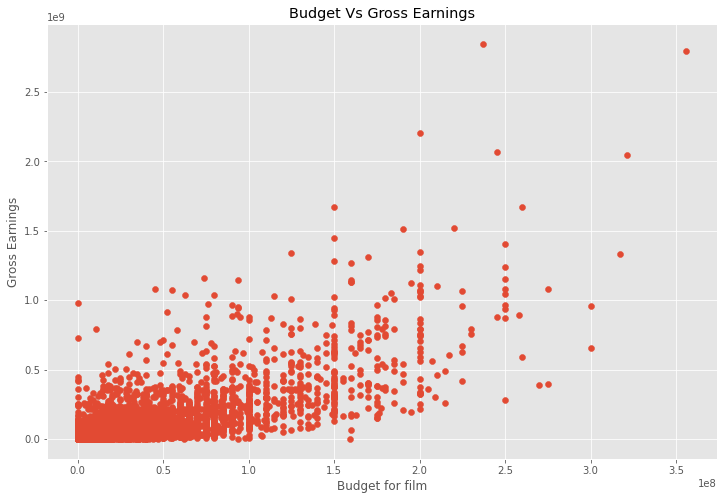

In [11]:
# Scatter plot Budget Vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

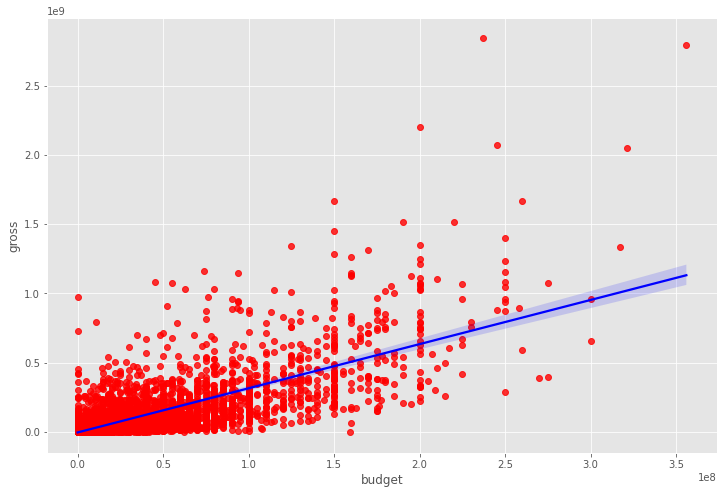

In [12]:
# Plot the Budget Vs Gross using seaborn

sns.regplot(x=df['budget'],y=df['gross'], data=df, scatter_kws={"color":"red"}, line_kws={'color':'blue'})

In [13]:
# Looking at Correlations

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [14]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


In [15]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [16]:
# There is a high correlation between Budget and Gross indeed

In [17]:
# We will use the default correlation values to further visualize it

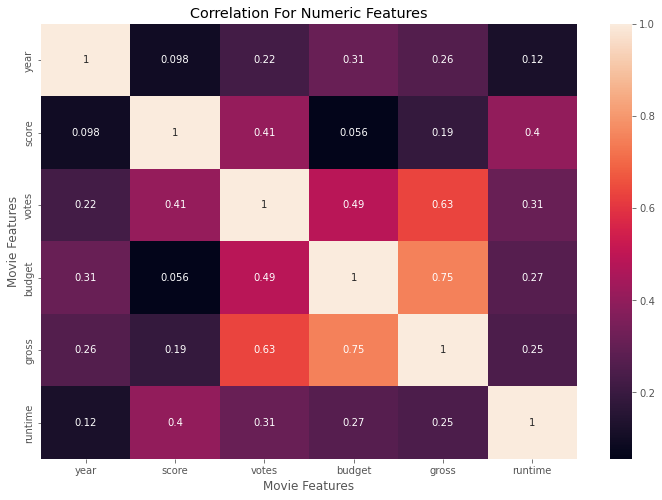

In [18]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation For Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [19]:
# Finding Correlation in Company
# We can only use numeric values in Correlations so we will have to make a 
# representation value for the company like an id for it 


In [20]:
df_numerized = df

In [21]:
for col in df_numerized:
    if(df_numerized[col].dtype == 'object'):
       df_numerized[col]= df_numerized[col].astype('category')
       df_numerized[col]= df_numerized[col].cat.codes
        
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,6,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,6,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,6,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,6,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1277,4.5,274.0,117,82,2797,55,0,0,1159,92.0
1614,1745,7,10,1989,55,5.2,1300.0,1033,1743,166,54,0,0,146,85.0
1606,2691,7,8,1989,257,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0
1601,3836,0,4,1989,1160,7.1,1500.0,1105,1696,681,18,0,0,504,104.0


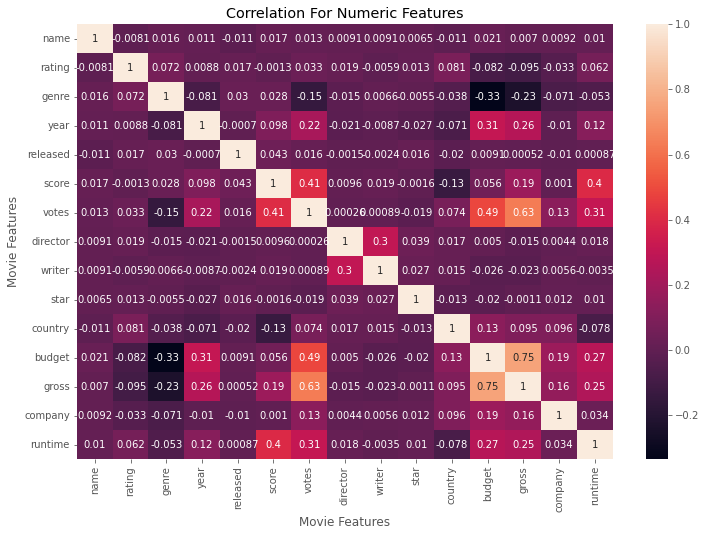

In [22]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation For Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [23]:
# unstacking the correlations to order them based on how high the correlation is 

df_numerized.corr()
unstacked_pairs = df_numerized.corr().unstack()
unstacked_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.269510
         gross       0.245235
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [24]:
sorted_pairs = unstacked_pairs.sort_values()
sorted_pairs

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.234297
genre    gross     -0.234297
         votes     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [25]:
high_corr= sorted_pairs[(sorted_pairs)>.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [26]:
# Votes and Budget have the highest Correlation to Gross Earnings
# And Company Has low Correlation